In [1]:
import numpy as np       # matrices
import scipy.optimize    # optimization routines
import matplotlib.pyplot as plt
import math
import pprint

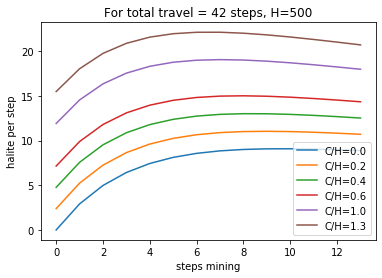

In [17]:
def R(n1,n2,m,H,C=0): # return halite per step
    return (C+(1-.75**m)*H)/(n1+n2+m)

def R_growth(n1, n2, m, H, C): # return halite per step, taking into consideration the 2% growth per cell
    return (C+(1-.75**m)*min(H*(1.02**n1),500))/(n1+n2+m)
H=500
C=650
n1=21
n2=21
r=[]
for C in [0,100, 200, 300,500,650]:
    r=[]
    for m in range(14):
       r.append(R(n1,n2,m,H,C=C))
    plt.plot(r,label='C/H={}'.format(C/H))
plt.title('For total travel = {} steps, H={}'.format(n1+n2,H))
plt.xlabel('steps mining')
plt.ylabel('halite per step')
plt.legend()

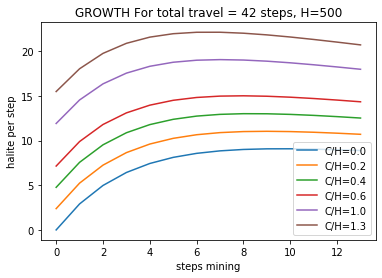

In [18]:
def R(n1,n2,m,H,C=0): # return halite per step
    return (C+(1-.75**m)*H)/(n1+n2+m)

def R_growth(n1, n2, m, H, C): # return halite per step, taking into consideration the 2% growth per cell
    return (C+(1-.75**m)*min(H*(1.02**n1),500))/(n1+n2+m)
H=500
C=650
n1=21
n2=21
r=[]
for C in [0,100, 200, 300,500,650]:
    r=[]
    r_growth = []
    for m in range(14):
       r.append(R(n1,n2,m,H,C=C))
       r_growth.append(R_growth(n1,n2,m,H,C=C))
    plt.plot(r_growth,label='C/H={}'.format(C/H))
plt.title('GROWTH For total travel = {} steps, H={}'.format(n1+n2,H))
plt.xlabel('steps mining')
plt.ylabel('halite per step')
plt.legend()

Text(0.5, 1.0, 'Optimal steps for mining by total travel')

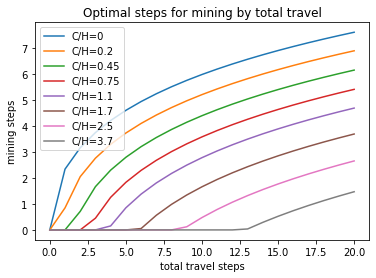

In [12]:
fig=plt.figure(1)
H=500
for CHratio in [0,.2,.45,.75,1.1,1.7,2.5,3.7]:
    opt=[]
    for travel in range(21):
        def h(mine):
            return -R(0,travel,mine,500,C=CHratio*H)  # we put - because we want to maximize R
        res=scipy.optimize.minimize_scalar(h, bounds=(0,15),method='Bounded')
        opt.append(res.x)
    plt.plot(opt,label='C/H={}'.format(CHratio))    
plt.xlabel('total travel steps')
plt.ylabel('mining steps')
plt.legend()
plt.title('Optimal steps for mining by total travel')

Text(0.5, 1.0, 'GROWTH Optimal steps for mining by total travel')

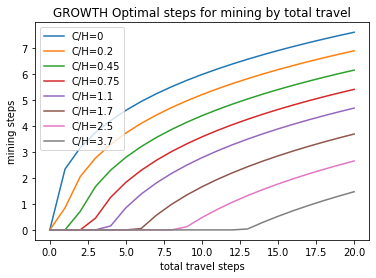

In [13]:
fig=plt.figure(1)
H=500
for CHratio in [0,.2,.45,.75,1.1,1.7,2.5,3.7]:
    opt=[]
    for travel in range(21):
        def h(mine):
            return -R_growth(0,travel,mine,500,C=CHratio*H)  # we put - because we want to maximize R
        res=scipy.optimize.minimize_scalar(h, bounds=(0,15),method='Bounded')
        opt.append(res.x)
    plt.plot(opt,label='C/H={}'.format(CHratio))    
plt.xlabel('total travel steps')
plt.ylabel('mining steps')
plt.legend()
plt.title('GROWTH Optimal steps for mining by total travel')

Text(0.5, 1.0, 'GROWTH Pt 2 Optimal steps for mining by total travel')

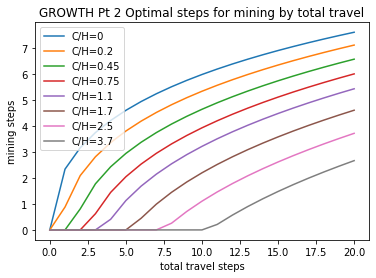

In [14]:
fig=plt.figure(1)
H=500
for CHratio in [0,.2,.45,.75,1.1,1.7,2.5,3.7]:
    opt=[]
    for travel in range(21):
        def h(mine):
            return -R_growth(travel,0,mine,500,C=CHratio*H)  # we put - because we want to maximize R
        res=scipy.optimize.minimize_scalar(h, bounds=(0,15),method='Bounded')
        opt.append(res.x)
    plt.plot(opt,label='C/H={}'.format(CHratio))    
plt.xlabel('total travel steps')
plt.ylabel('mining steps')
plt.legend()
plt.title('GROWTH Pt 2 Optimal steps for mining by total travel')

('array([[0, 2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8],\n'
 '       [0, 1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7],\n'
 '       [0, 0, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7],\n'
 '       [0, 0, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6],\n'
 '       [0, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6],\n'
 '       [0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])')


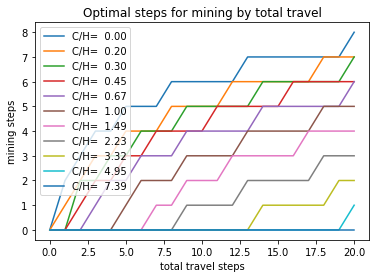

In [19]:
#Now do it with rounded off integers
fig=plt.figure(1)
H=500
#integer ch = 2.5 ln(C/H) + 5, so each 1.5x change gives increment of 1
chrange=11
maxsteps=21
matrix=np.zeros((chrange,maxsteps))  # turn into matrix when done
for ch in range(chrange):
    if ch==0:
        CHratio=0
    else:
        CHratio=math.exp((ch-5)/2.5)
    opt=[]
    for travel in range(maxsteps):
        def h(mine):
            return -R(0,travel,mine,500,C=CHratio*H)  # we put - because we want to maximize R
        res=scipy.optimize.minimize_scalar(h, bounds=(0,15),method='Bounded')
        opt.append(int(res.x+.5))
        matrix[ch,travel]=int(res.x+.5)
    plt.plot(opt,label='C/H={:6.2f}'.format(CHratio))    
plt.xlabel('total travel steps')
plt.ylabel('mining steps')
plt.legend()
plt.title('Optimal steps for mining by total travel')
#write out the numbers in a matrix for importing into agent
pprint.pprint(repr(np.array(matrix).astype(np.int)))

('array([[0, 2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8],\n'
 '       [0, 1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7],\n'
 '       [0, 0, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7],\n'
 '       [0, 0, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6],\n'
 '       [0, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6],\n'
 '       [0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],\n'
 '       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])')


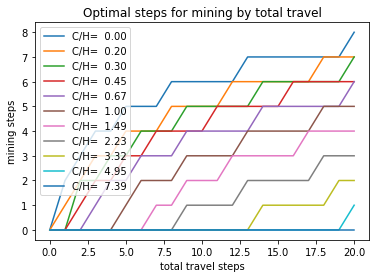

In [20]:
#Now do it with rounded off integers
fig=plt.figure(1)
H=500
#integer ch = 2.5 ln(C/H) + 5, so each 1.5x change gives increment of 1
chrange=11
maxsteps=21
matrix=np.zeros((chrange,maxsteps))  # turn into matrix when done
for ch in range(chrange):
    if ch==0:
        CHratio=0
    else:
        CHratio=math.exp((ch-5)/2.5)
    opt=[]
    for travel in range(maxsteps):
        def h(mine):
            return -R_growth(travel,0,mine,500,C=CHratio*H)  # we put - because we want to maximize R
        res=scipy.optimize.minimize_scalar(h, bounds=(0,15),method='Bounded')
        opt.append(int(res.x+.5))
        matrix[ch,travel]=int(res.x+.5)
    plt.plot(opt,label='C/H={:6.2f}'.format(CHratio))    
plt.xlabel('total travel steps')
plt.ylabel('mining steps')
plt.legend()
plt.title('Optimal steps for mining by total travel')
#write out the numbers in a matrix for importing into agent
pprint.pprint(repr(np.array(matrix).astype(np.int)))